In [1]:
import os
import sys
import numpy as np
import healpy as hp
import histlite as hl
import csky as cy
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
%matplotlib inline
# %matplotlib notebook

from glob import glob
timer = cy.timing.Timer()
time = timer.time

import SETTING
paths = SETTING.PATH()
print(paths)
USER = paths.USER
ICDATA_DIR = paths.ICDATA_DIR
DATA_DIR = paths.DATA_DIR
ANA_DIR = paths.ANA_DIR

from utils import *


#### Running at IceCube ####

LOCATION: 	 IceCube
USER: 	 cjchen
ICDATA_DIR: 	 /data/user/cjchen/csky/analyses/online_GRECO/version-002-p04
DATA_DIR: 	 /data/user/cjchen/2020-2021/Spring2021/greco_grb/data
ANA_DIR: 	 /data/user/cjchen/2020-2021/Spring2021/greco_grb/data/csky_output



In [17]:
stay_awake(180)

0 min -> 3 min -> 6 min -> 9 min -> 12 min -> 15 min -> 18 min -> 21 min -> 24 min -> 27 min -> 

KeyboardInterrupt: 

In [2]:
# load all-in-one df
df = pd.read_pickle(DATA_DIR+"/grbwebgbm/grbweb_gbm_healpix_nside64.pkl")

In [3]:
df.head()

,grb_name,grb_name_GBM,ra,dec,mjd_start,t100,t90,gbm,source_uncertainty,redshift,t_center,hasHealpix,probs
0,GRB190613B,GRB190613449,305.431917,-4.646667,58647.449285,0.001905,0.000056,0,0.000056,NaN,58647.450238,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,GRB190613A,GRB190613172,182.529208,67.235278,58647.171736,0.000204,0.000198,0,0.000056,NaN,58647.171838,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,GRB190612A,GRB190612165,223.950000,62.100000,58646.164836,0.001677,0.001677,1,7.025096,NaN,58646.165675,True,"[1.8016500009675246e-06, 2.0288993030385598e-0..."
3,GRB190611B,GRB190611950,84.758333,50.833333,58645.949833,0.001217,0.001164,0,5.900000,NaN,58645.950442,True,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,GRB190611A,None,324.722625,-56.074278,58645.742373,0.000484,0.000484,0,0.000194,NaN,58645.742615,False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


# GRB List

## t100 distribution

In [4]:
hl.hist(df.t100*86400.
         ,bins=np.r_[np.logspace(np.log10(0.001), np.log10(2.5), 20, endpoint=False), np.logspace(np.log10(2.5), np.log10(10000), 20)])

Hist(39 bins in [0.001,10000.0], with sum 2051.0, 10 empty bins, and 0 non-finite values)

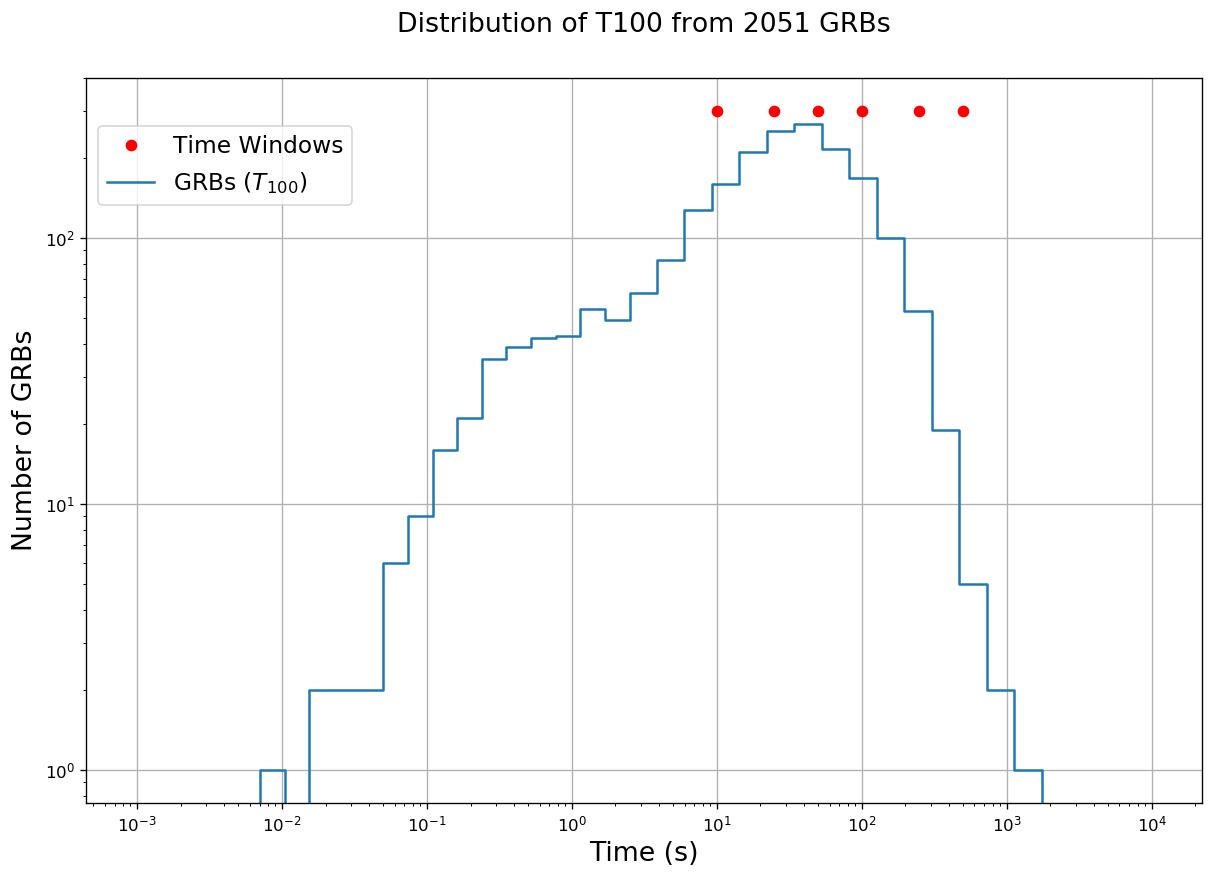

In [5]:
fig, ax = plt.subplots(figsize=(12,8), dpi=120)

h = hl.hist (df.t100*86400.
             ,bins=np.r_[
                 np.logspace(np.log10(0.001), np.log10(2.5), 20, endpoint=False), 
                 np.logspace(np.log10(2.5), np.log10(10000), 20)
             ])
hl.plot1d (ax, h, label=r'GRBs ($T_{100}$)')

ax.plot([10,25,50,100,250,500], np.ones(6)+300, 'ro', label="Time Windows")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Time (s)', fontsize=16)
ax.set_ylabel('Number of GRBs', fontsize=16)
ax.grid(True)
ax.legend(loc='upper left', ncol=1, bbox_to_anchor=(0.0, 0.95), fontsize=14)
ax.set_title('Distribution of T100 from {} GRBs'.format(len(df.t100)), fontsize=16, y=1.05)
plt.show()

## angular and spatial separation

In [6]:
"""
grb_pairs = []
mjd_separation = []
angular_separation = []
with time('get separation'):
    for i in df.index[:]:
        if i % 10 == 0: print("i: ", i)
        for j in df.index[i+1:]:
            grb_pair = set([df.grb_name[i], df.grb_name[j]])
            mjd_diff = abs(df['mjd_start'][i] - df['mjd_start'][j])
            ang_diff = cy.coord.delta_angle(
                np.deg2rad(df.dec[i])
                , np.deg2rad(df.ra[i])
                , np.deg2rad(df.dec[j])
                , np.deg2rad(df.ra[j])
                , latlon=True)
            grb_pairs.append(grb_pair)
            mjd_separation.append(mjd_diff)
            angular_separation.append(np.rad2deg(ang_diff))
grb_pairs = np.array(grb_pairs)
mjd_separation = np.array(mjd_separation)
angular_separation = np.array(angular_separation)
separation_df = pd.DataFrame({
    'grb_pair': grb_pairs, 
    'mjd_diff': mjd_separation, 
    'angular_diff': angular_separation
})
separation_df.to_pickle(DATA_DIR+"/plot/Proximities.pkl")
"""

'\ngrb_pairs = []\nmjd_separation = []\nangular_separation = []\nwith time(\'get separation\'):\n    for i in df.index[:]:\n        if i % 10 == 0: print("i: ", i)\n        for j in df.index[i+1:]:\n            grb_pair = set([df.grb_name[i], df.grb_name[j]])\n            mjd_diff = abs(df[\'mjd_start\'][i] - df[\'mjd_start\'][j])\n            ang_diff = cy.coord.delta_angle(\n                np.deg2rad(df.dec[i])\n                , np.deg2rad(df.ra[i])\n                , np.deg2rad(df.dec[j])\n                , np.deg2rad(df.ra[j])\n                , latlon=True)\n            grb_pairs.append(grb_pair)\n            mjd_separation.append(mjd_diff)\n            angular_separation.append(np.rad2deg(ang_diff))\ngrb_pairs = np.array(grb_pairs)\nmjd_separation = np.array(mjd_separation)\nangular_separation = np.array(angular_separation)\nseparation_df = pd.DataFrame({\n    \'grb_pair\': grb_pairs, \n    \'mjd_diff\': mjd_separation, \n    \'angular_diff\': angular_separation\n})\nseparation

In [10]:
## works on HIVE
# separation_df = pd.read_pickle(DATA_DIR+"/plot/Proximities.pkl")
# separation_df['mjd_diff_seconds'] = separation_df["mjd_diff"] * 86400.
# separation_df.head()

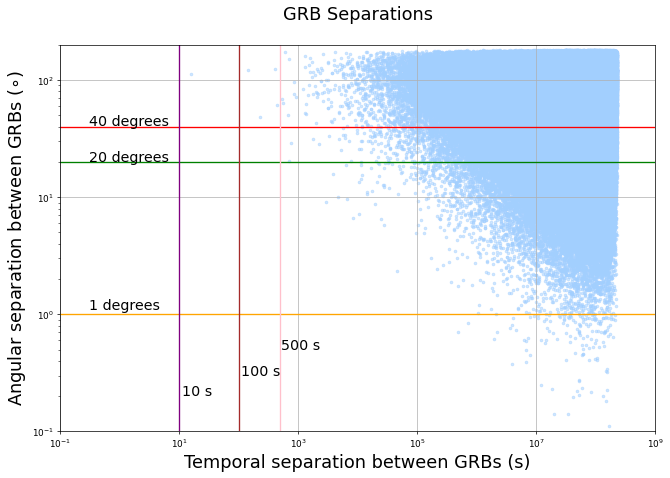

In [9]:
fig, ax = plt.subplots(figsize=(12,8), dpi=64)

ax.scatter(separation_df['mjd_diff_seconds']
           , separation_df['angular_diff']
           , c="#a2cffe"
           , marker='.'
           , alpha = 0.5)

ax.axhline(1,color = 'orange')
ax.text(0.3, 1.1, '1 degrees', fontsize=16)
ax.axhline(20,color = 'green')
ax.text(0.3, 20.1, '20 degrees', fontsize=16)
ax.axhline(40,color = 'red')
ax.text(0.3, 41, '40 degrees', fontsize=16)

ax.axvline(10, color = 'purple')
ax.text(11, .2, '10 s', fontsize=16)
ax.axvline(100, color = 'brown')
ax.text(110, .3, '100 s', fontsize=16)
ax.axvline(500, color = 'pink')
ax.text(510, .5, '500 s', fontsize=16)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Temporal separation between GRBs (s)', fontsize=20)
ax.set_ylabel(r'Angular separation between GRBs ($\circ$)', fontsize=20)
ax.set_xlim(1e-1,1e9)
ax.set_ylim(1e-1,2e2)
ax.grid(True)
# ax.legend(loc='upper left', ncol=1, bbox_to_anchor=(0.0, 0.95), fontsize=16)
ax.set_title('GRB Separations', fontsize=20, y=1.05)
plt.show()

# Healpix Map

## real healpix example: GRB180423A

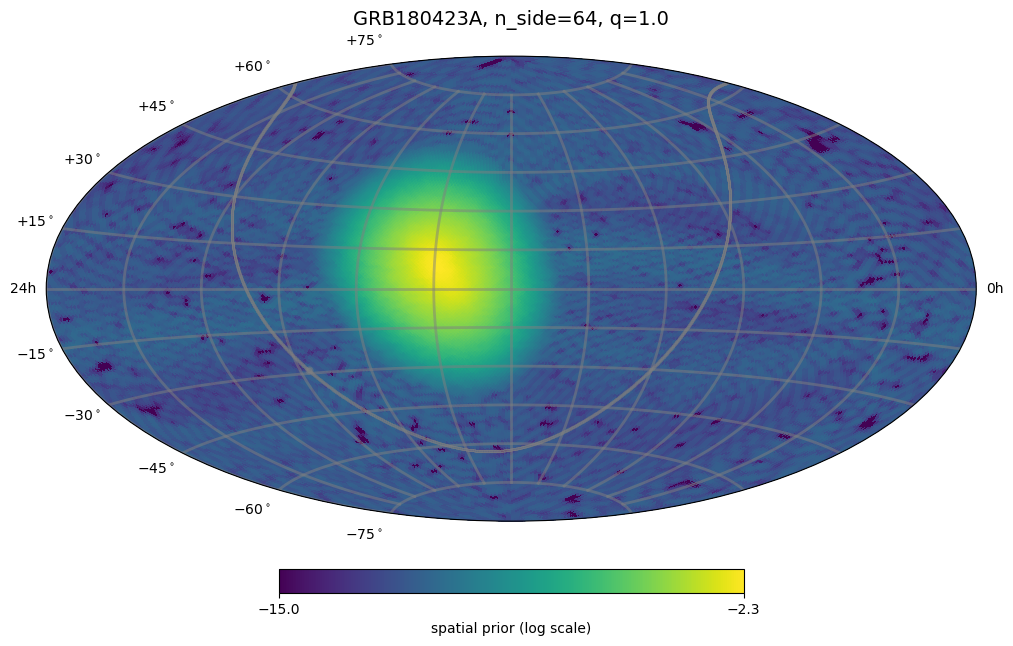

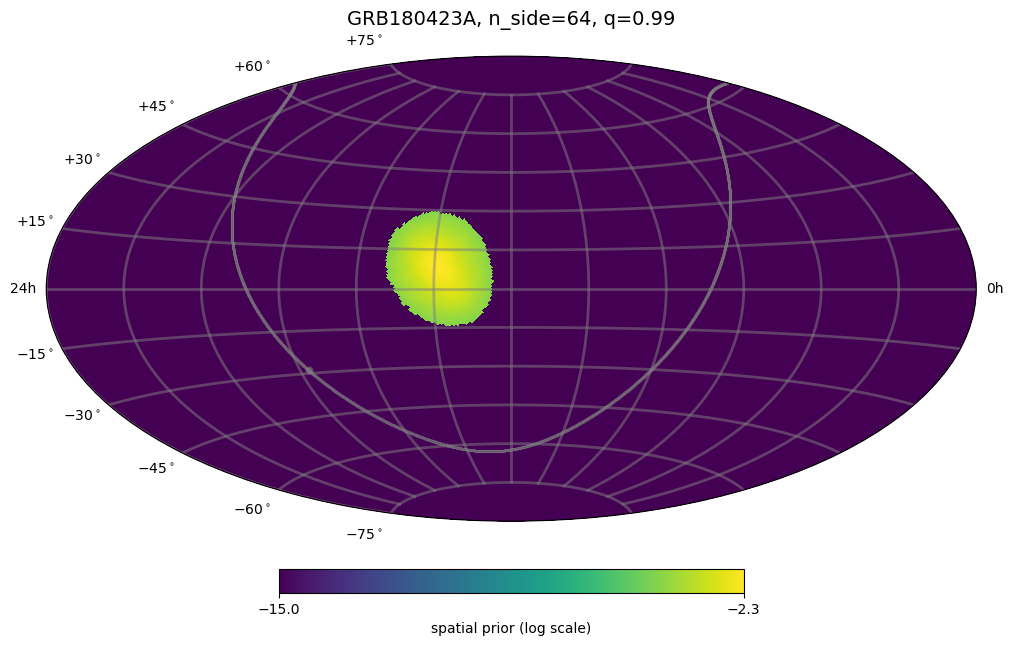

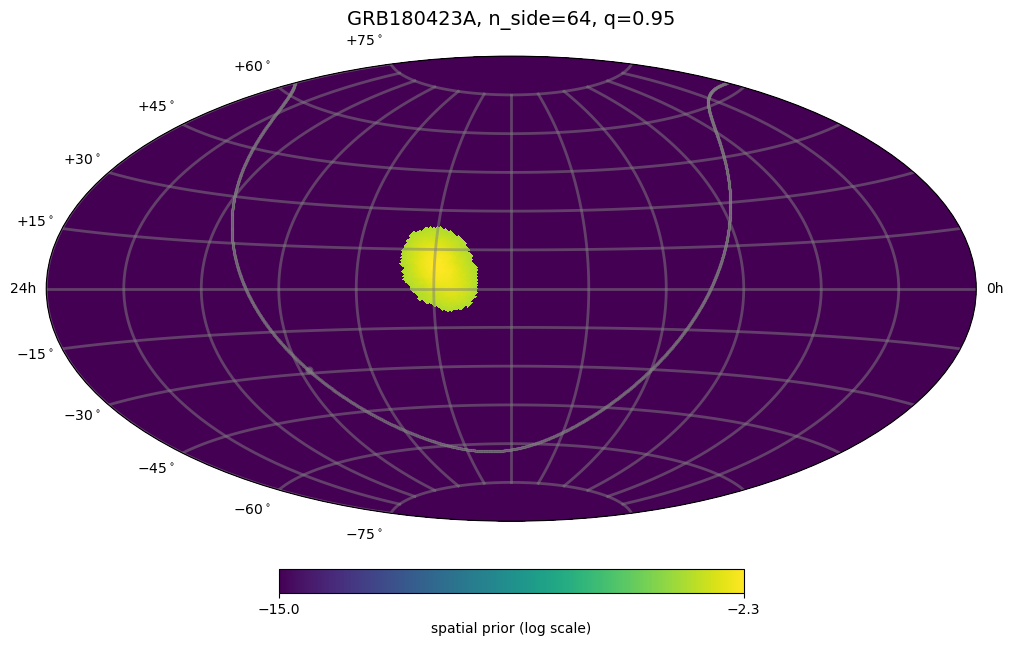

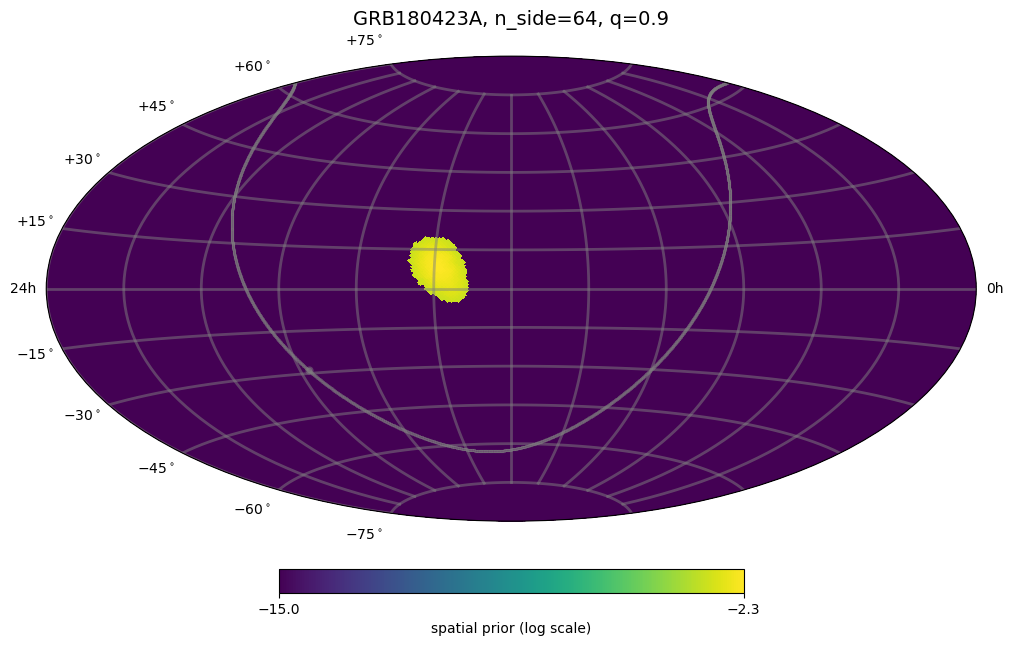

In [7]:
healpix = np.load(DATA_DIR+"/grbwebgbm/healpix/{}_healpix_nside64.npy".format("GRB180423A"))
for q in [1.0, 0.99, 0.95, 0.90]:
    healpix[healpix <= isf_healpix(healpix, q=q)] = 0
    fig, ax = plt.subplots (figsize=(12,8), dpi=100,
                            subplot_kw=dict (projection='aitoff'))
    sp = cy.plotting.SkyPlotter(pc_kw=dict())
    mesh, cb = sp.plot_map(ax, np.log10(np.maximum(healpix, 1e-15)), n_ticks=2)
    kw = dict(color='.5', alpha=.5, linewidth=2)
    sp.plot_gp(ax, lw=.5, **kw)
    sp.plot_gc(ax, **kw)
    ax.grid(**kw)
    cb.set_label(r'spatial prior (log scale)')
    ax.set_title("GRB180423A, n_side=64, q={}".format(q), fontsize=14, y=1.05)
    # plt.tight_layout()
    plt.show()


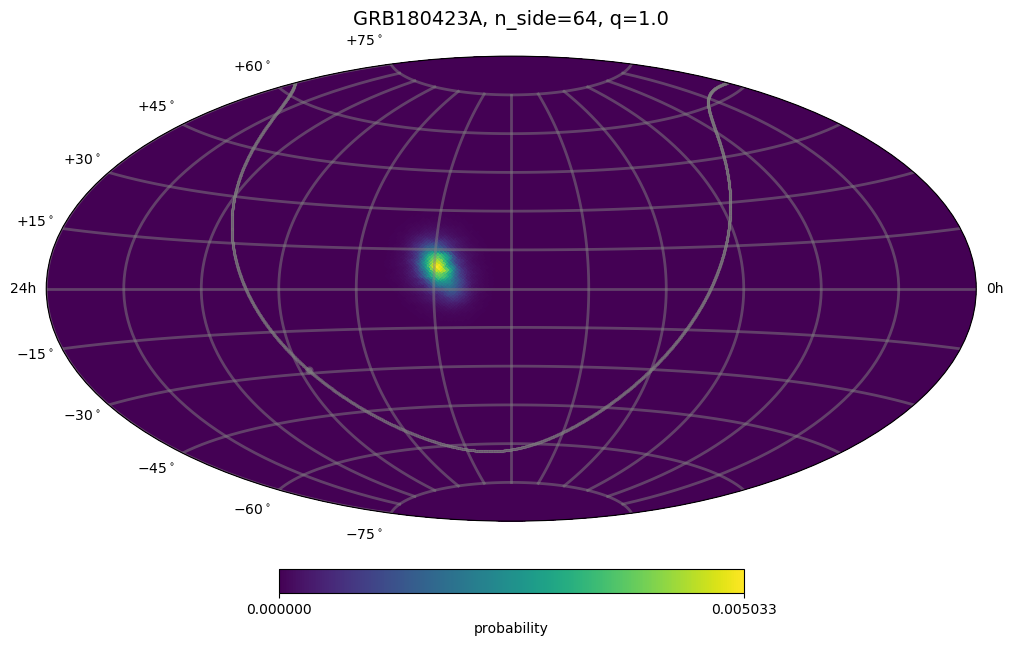

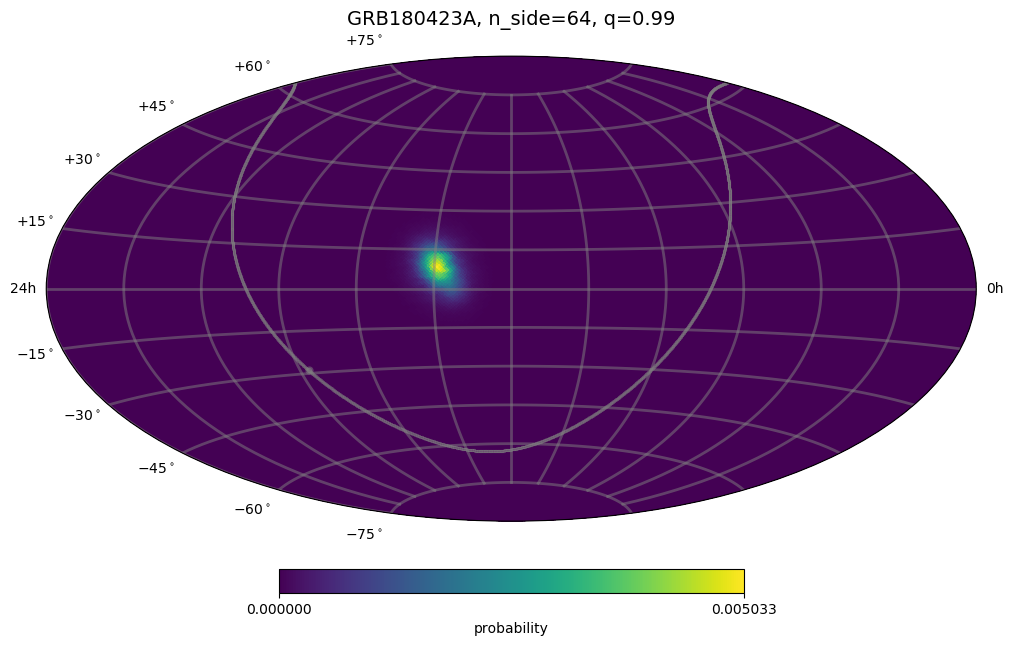

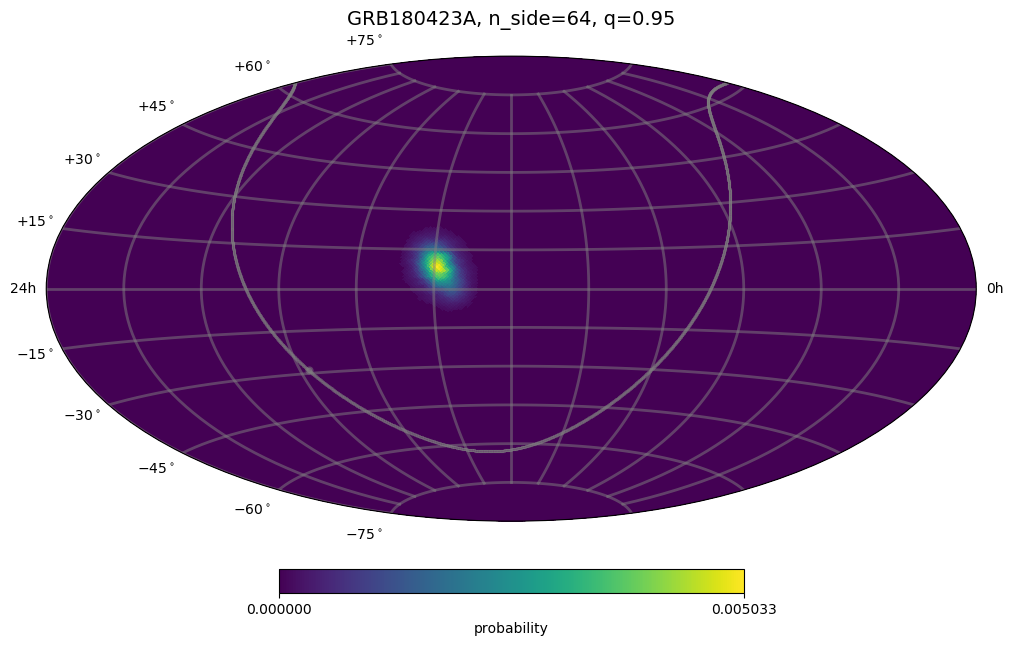

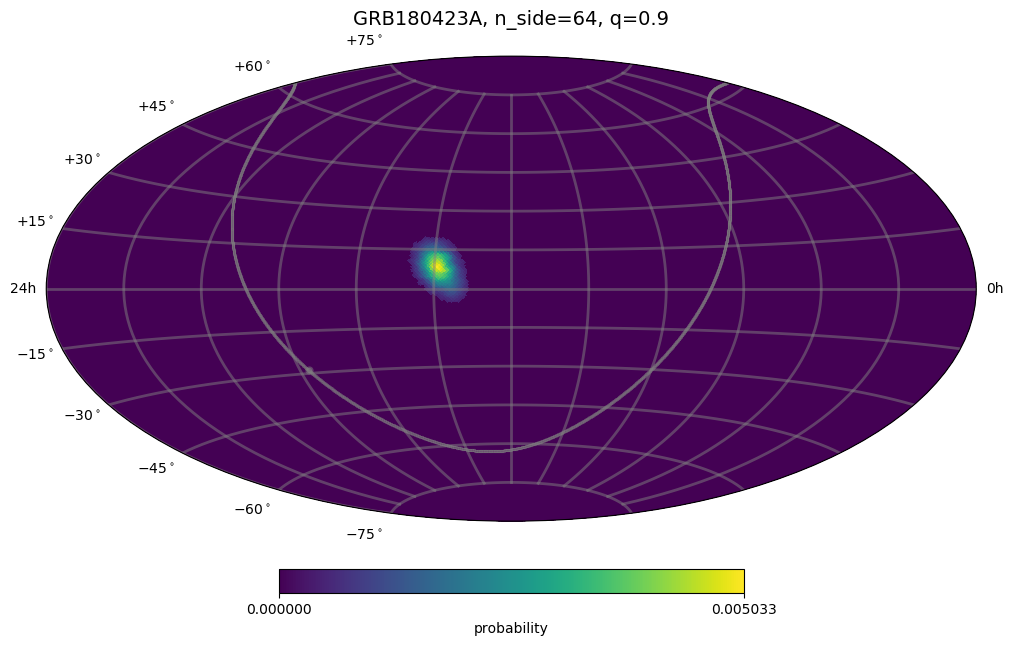

In [8]:
healpix = np.load(DATA_DIR+"/grbwebgbm/healpix/{}_healpix_nside64.npy".format("GRB180423A"))
for q in [1.0, 0.99, 0.95, 0.90]:
    healpix[healpix <= isf_healpix(healpix, q=q)] = 0
    fig, ax = plt.subplots (figsize=(12,8), dpi=100,
                            subplot_kw=dict (projection='aitoff'))
    sp = cy.plotting.SkyPlotter(pc_kw=dict())
    mesh, cb = sp.plot_map(ax, healpix, 1e-15, n_ticks=2)
    kw = dict(color='.5', alpha=.5, linewidth=2)
    sp.plot_gp(ax, lw=.5, **kw)
    sp.plot_gc(ax, **kw)
    ax.grid(**kw)
    cb.set_label(r'probability')
    ax.set_title("GRB180423A, n_side=64, q={}".format(q), fontsize=14, y=1.05)
    # plt.tight_layout()
    plt.show()



# GRECO datasets

# Time windows

Text(0.5,1,'Size of Time Window')

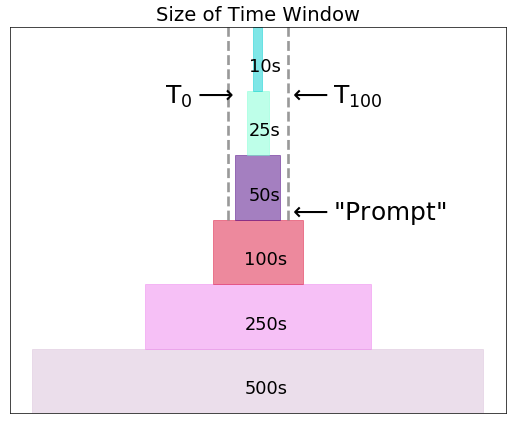

In [9]:
t100_start = -33
t100_end = +33
t_50 = (t100_start+t100_end)/2.
fig, ax = plt.subplots(figsize=(10,8), dpi=64)

l = 6.

tw=500
idx = 0
ax.axvspan(t_50-tw/2., t_50+tw/2., idx/l, (idx+1)/l, alpha=0.5, color='thistle')
ax.text(t_50-15, idx/l+0.05, '500s', fontsize=20)
tw=250
idx = 1
ax.axvspan(t_50-tw/2., t_50+tw/2., idx/l, (idx+1)/l, alpha=0.5, color='violet')
ax.text(t_50-15, idx/l+0.05, '250s', fontsize=20)
tw=100
idx = 2
ax.axvspan(t_50-tw/2., t_50+tw/2., idx/l, (idx+1)/l, alpha=0.5, color='crimson')
ax.text(t_50-15, idx/l+0.05, '100s', fontsize=20)
tw=50
idx = 3
ax.axvspan(t_50-tw/2., t_50+tw/2., idx/l, (idx+1)/l, alpha=0.5, color='indigo')
ax.text(t_50-10, idx/l+0.05, '50s', fontsize=20)
tw=25
idx = 4
ax.axvspan(t_50-tw/2., t_50+tw/2., idx/l, (idx+1)/l, alpha=0.5, color='aquamarine')
ax.text(t_50-10, idx/l+0.05, '25s', fontsize=20)
tw=10
idx = 5
ax.axvspan(t_50-tw/2., t_50+tw/2., idx/l, (idx+1)/l, alpha=0.5, color='darkturquoise')
ax.text(t_50-10, idx/l+0.05, '10s', fontsize=20)

ax.axvline(t100_start, 0.5, 1, linestyle='--', color='grey', alpha=0.8, linewidth=3)
ax.axvline(t100_end, 0.5, 1, linestyle='--', color='grey', alpha=0.8, linewidth=3)

ax.text(t100_start-70, 0.8, r'T$_{0}\longrightarrow$', fontsize=28)
ax.text(t100_end+0.011, 0.8, r'$\longleftarrow$T$_{100}$', fontsize=28)
ax.text(t100_end+0.012, 0.5, r'$\longleftarrow$"Prompt"', fontsize=28)

ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Size of Time Window', fontsize=22)

# Analysis

## background scan

In [10]:
from scipy import sparse
file = DATA_DIR+"/plot/GRB180423A_batchSize1000_batchIndex0_tw500_backup.npz"
scan = sparse.load_npz(file)
maps = sparse.csr_matrix((0, hp.nside2npix(64)), dtype=float)
maps = sparse.vstack((maps, scan))

In [11]:
2,8,11,12,13,17,'23','28',

(2, 8, 11, 12, 13, 17, '23', '28')

In [144]:
np.min(ts_prior[ts_prior > 0])

0.0004981001710326893

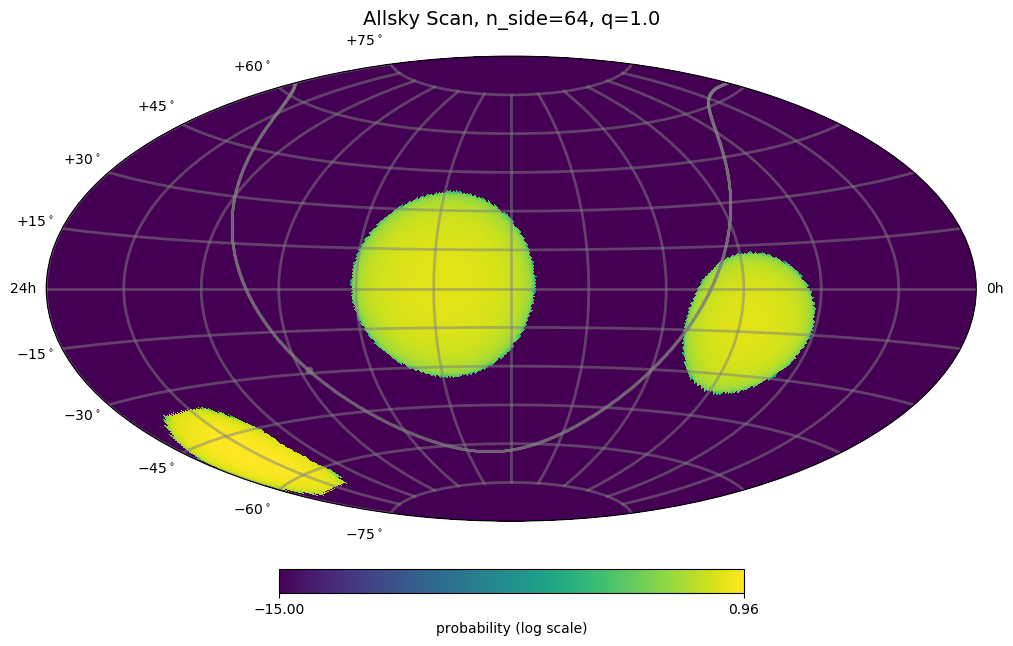

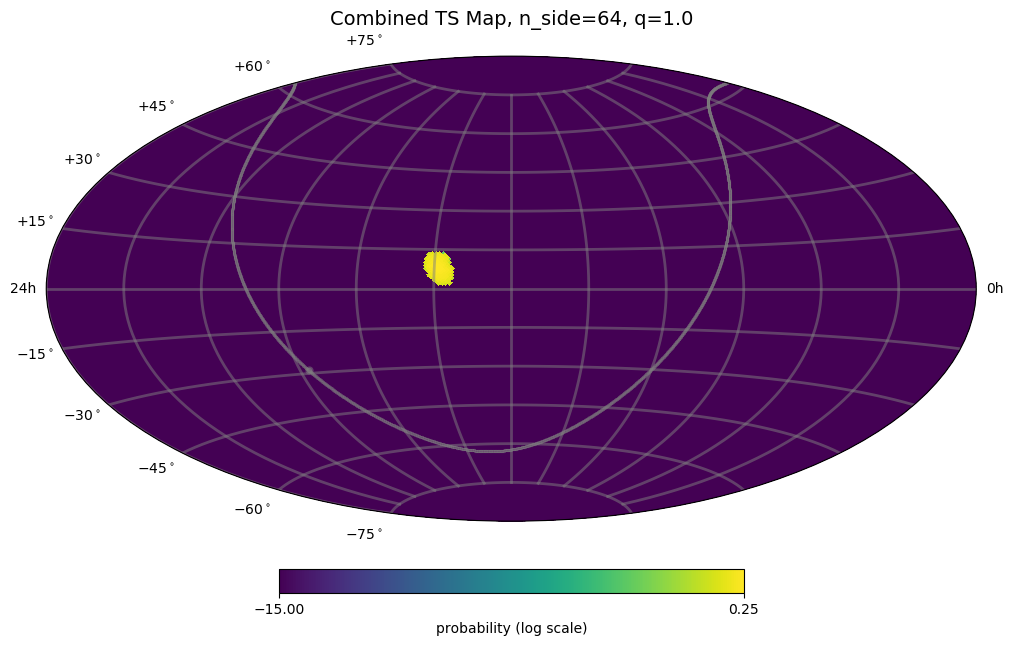

In [14]:
healpix = maps[23].toarray()[0]
q=1.
healpix[healpix <= isf_healpix(healpix, q=q)] = 0
fig, ax = plt.subplots (figsize=(12,8), dpi=100,
                        subplot_kw=dict (projection='aitoff'))
sp = cy.plotting.SkyPlotter(pc_kw=dict())
mesh, cb = sp.plot_map(ax, np.log10(np.maximum(healpix, 1e-15)), n_ticks=2)
kw = dict(color='.5', alpha=.5, linewidth=2)
sp.plot_gp(ax, lw=.5, **kw)
sp.plot_gc(ax, **kw)
ax.grid(**kw)
cb.set_label(r'probability (log scale)')
ax.set_title("Allsky Scan, n_side=64, q={}".format(q), fontsize=14, y=1.05)
# plt.tight_layout()
plt.show()

##################################################################################################

probs = np.load(DATA_DIR+"/grbwebgbm/healpix/{}_healpix_nside64.npy".format("GRB180423A"))
probs = np.maximum(probs, 1e-15)
ts_norm = np.log(np.amax(probs))
ts_prior = healpix + 2*(np.log(probs) - ts_norm)
ts_prior = np.maximum(ts_prior, 1e-15)
fig, ax = plt.subplots (figsize=(12,8), dpi=100,
                        subplot_kw=dict (projection='aitoff'))
sp = cy.plotting.SkyPlotter(pc_kw=dict())
mesh, cb = sp.plot_map(ax, np.log10(np.maximum(ts_prior, 1e-15)), n_ticks=2)
kw = dict(color='.5', alpha=.5, linewidth=2)
sp.plot_gp(ax, lw=.5, **kw)
sp.plot_gc(ax, **kw)
ax.grid(**kw)
cb.set_label(r'probability (log scale)')
ax.set_title("Combined TS Map, n_side=64, q={}".format(q), fontsize=14, y=1.05)
# plt.tight_layout()
plt.show()


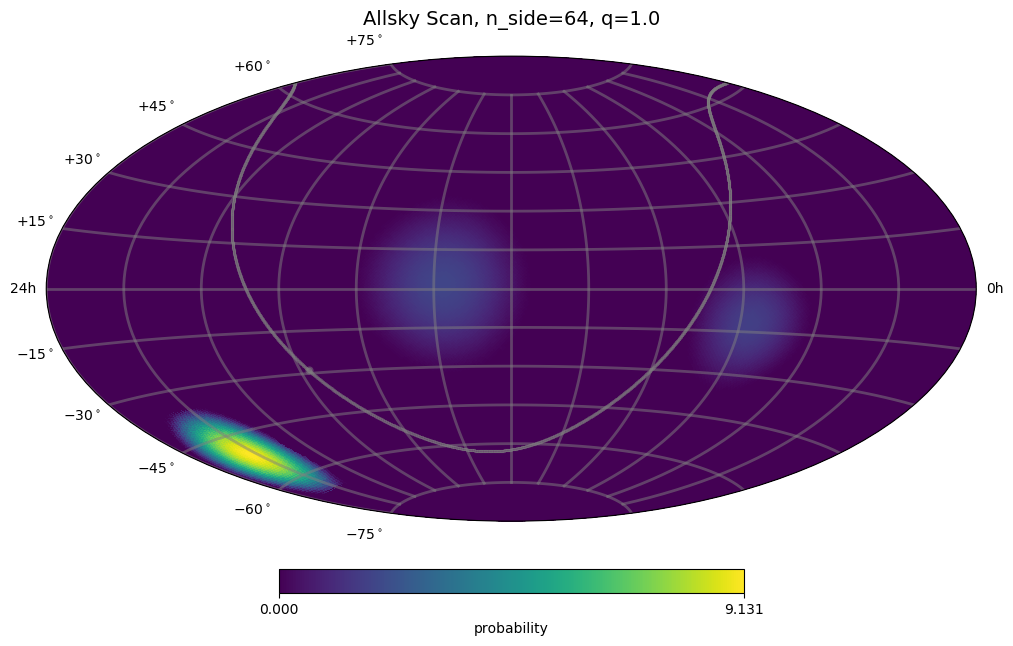

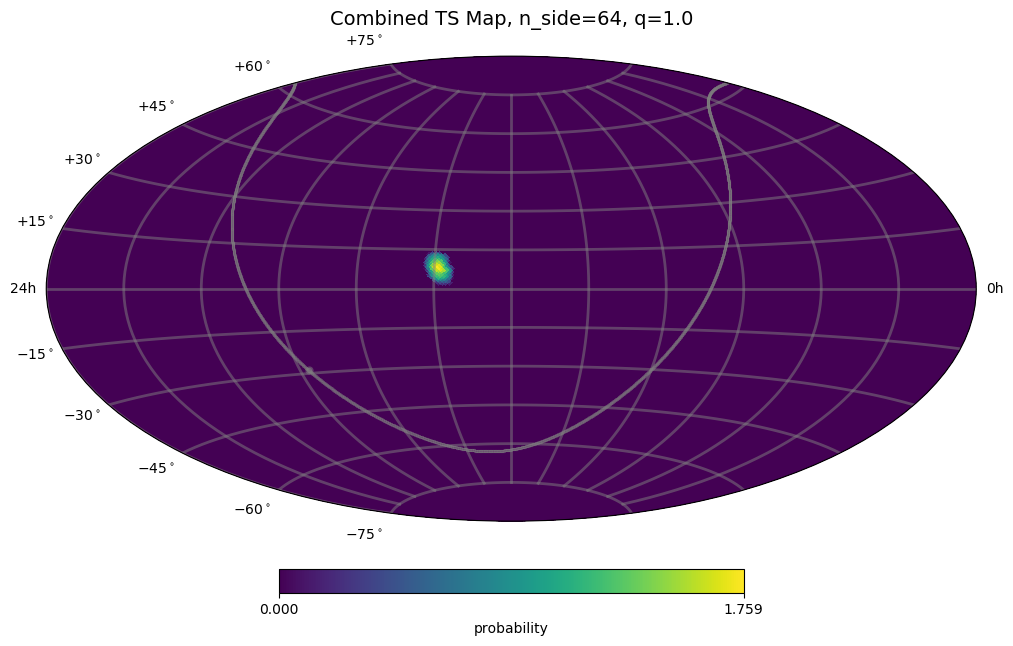

In [15]:
q=1.
healpix[healpix <= isf_healpix(healpix, q=q)] = 0
fig, ax = plt.subplots (figsize=(12,8), dpi=100,
                        subplot_kw=dict (projection='aitoff'))
sp = cy.plotting.SkyPlotter(pc_kw=dict())
mesh, cb = sp.plot_map(ax, healpix, 1e-15, n_ticks=2)
kw = dict(color='.5', alpha=.5, linewidth=2)
sp.plot_gp(ax, lw=.5, **kw)
sp.plot_gc(ax, **kw)
ax.grid(**kw)
cb.set_label(r'probability')
ax.set_title("Allsky Scan, n_side=64, q={}".format(q), fontsize=14, y=1.05)
# plt.tight_layout()
plt.show()


##################################################################################################

probs = np.load(DATA_DIR+"/grbwebgbm/healpix/{}_healpix_nside64.npy".format("GRB180423A"))
probs = np.maximum(probs, 1e-15)
ts_norm = np.log(np.amax(probs))
ts_prior = healpix + 2*(np.log(probs) - ts_norm)
ts_prior = np.maximum(ts_prior, 1e-15)
fig, ax = plt.subplots (figsize=(12,8), dpi=100,
                        subplot_kw=dict (projection='aitoff'))
sp = cy.plotting.SkyPlotter(pc_kw=dict())
mesh, cb = sp.plot_map(ax, np.maximum(ts_prior, 1e-15), n_ticks=2)
kw = dict(color='.5', alpha=.5, linewidth=2)
sp.plot_gp(ax, lw=.5, **kw)
sp.plot_gc(ax, **kw)
ax.grid(**kw)
cb.set_label(r'probability')
ax.set_title("Combined TS Map, n_side=64, q={}".format(q), fontsize=14, y=1.05)
# plt.tight_layout()
plt.show()

